In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt


import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

import seaborn as sns

import statsmodels.api as sm

from scipy import stats

In [2]:
#dwarf_table1 = Table.read('new_dwarf_table.txt', format = 'ascii.commented_header')
#dwarf_table1[20:40]

In [3]:
#dwarf_table1 = Table.read('dwarf_table.txt', format = 'ascii.commented_header')
#dwarf_table[20:40]
dwarf_table = Table.read('dwarf_table.txt', format = 'ascii.commented_header')
dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,BPTclass,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,1.0,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,1.0,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,1.0,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,1.0,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,1.0,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549


In [4]:
new_metallicities = Table.read('new_metallicities.txt', format = 'ascii.commented_header')
new_metallicities

ID,Z12logOH_N2,Z12logOH_O3N2,Z12logOH_N2O2
int32,float64,float64,float64
0,nan,nan,nan
1,9.24100978108516,9.932579564097487,9.550688864062717
2,nan,nan,nan
3,9.006879083032793,9.531955308832202,8.792412403614268
4,nan,nan,nan
5,9.231683652961154,9.388994080579156,9.186057390386843
6,9.74394359865935,9.822147352557094,9.681489570907425
7,8.925481829348604,9.859745839672499,9.193186243794619
8,9.063539942735755,9.781663701398578,9.057058458225855


## Had to fill empty cells to get the plots to work

In [5]:
new_metallicities['ID'] = new_metallicities['ID'].filled(-1)
new_metallicities['Z12logOH_N2'] = new_metallicities['Z12logOH_N2'].filled(np.nan)
new_metallicities['Z12logOH_N2O2'] = new_metallicities['Z12logOH_N2O2'].filled(np.nan)
new_metallicities['Z12logOH_O3N2'] = new_metallicities['Z12logOH_O3N2'].filled(np.nan)

In [6]:
new_metallicities

ID,Z12logOH_N2,Z12logOH_O3N2,Z12logOH_N2O2
int32,float64,float64,float64
0,nan,nan,nan
1,9.24100978108516,9.932579564097487,9.550688864062717
2,nan,nan,nan
3,9.006879083032793,9.531955308832202,8.792412403614268
4,nan,nan,nan
5,9.231683652961154,9.388994080579156,9.186057390386843
6,9.74394359865935,9.822147352557094,9.681489570907425
7,8.925481829348604,9.859745839672499,9.193186243794619
8,9.063539942735755,9.781663701398578,9.057058458225855


In [7]:
from astropy.table import Table, join
dwarf_table2 = join(dwarf_table, new_metallicities, join_type='left', keys='ID')

In [8]:
dwarf_table2[20:40]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,BPTclass,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,Z12logOH_N2,Z12logOH_O3N2,Z12logOH_N2O2
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,float64,float64,float64
-99.0,1.0,154.65694596052526,-0.42196279812925064,0.01811487227678299,-16.288087844848633,0.9270355105400085,nan,nan,nan,nan,nan,nan,nan,nan,1,1829,nan,586495,0.21727490773680622,586495,4.047816827440823,586495,0.22228721535002324,586495,4.141195779075985,nan,nan,nan
172.62,1.0,153.75970620721034,0.9682556489167827,0.021199265494942665,-16.96735191345215,1.2557484209537506,-9.458992958068848,nan,0.0,2.7247581213022816,7.30349211034837,0.3358532639275543,-0.9601565188559871,0.46385247409254277,2,1943,1.0,61008,0.39972370540896796,61008,2.236739518477444,60757,1.1036625638046138,60997,5.287124858231159,8.759846035048204,9.530469504857205,8.598769114019241
0.0,1.0,155.41179798948707,0.9002553533325333,0.0023375554010272026,-12.911161422729492,1.4624316990375519,-8.750261306762695,7.41,nan,nan,nan,nan,nan,nan,2,2092,2.0,608190,0.3759800772713868,587104,4.815857271681121,609324,0.5525273695267658,587447,7.597122510807735,nan,-inf,nan
144.23,1.0,155.9828028458709,1.033402258131225,0.02267528884112835,-16.907424926757812,1.3205188512802124,-9.122611045837402,9.26,0.0,1.545316433107025,7.815227912034597,0.13961481456371194,-1.332553203579339,0.17404300822811938,2,2309,1.0,2336,0.2123494973962944,2336,0.7181639927834441,2333,0.4785615808127944,2333,3.8785740594358127,8.455435043095651,9.408313492142568,8.970394675398328
48.24,1.0,156.0591174756552,0.14773846624918113,0.023326674476265907,-16.590179443359375,1.5584875643253326,-10.03125,nan,nan,nan,nan,nan,nan,nan,2,2361,1.0,586725,0.03398273570332749,586725,0.14926278717424318,586725,0.26072261428417004,586725,1.145175139139837,8.874792270120832,9.495460029921603,9.101808055810128
128.66,1.0,159.30951877078462,-0.08743954419338047,0.021261854097247124,-16.6418399810791,1.7035429179668427,-9.632553100585938,nan,nan,nan,nan,nan,nan,nan,2,2457,1.0,587198,0.21474116954670946,587198,3.5350305558999526,587108,0.838293159661571,587267,9.52980778658316,8.691605009129487,9.630343014552771,nan
144.71,1.0,158.93195067864386,0.00855941231520523,0.01676873490214348,-16.140260696411133,1.316695660352707,-9.58098030090332,nan,nan,nan,nan,nan,nan,nan,1,2728,1.0,2474,0.3550145741418967,2474,2.668094728546813,2474,0.40352895863164473,2474,3.032702220587558,8.654750348346095,9.475510793741842,nan
126.68,1.0,159.00858821437066,0.9890581756152056,0.018943272531032562,-16.428030014038086,1.3676829636096954,-9.606098175048828,nan,nan,nan,nan,nan,nan,nan,1,2734,1.0,587180,0.5874650760881942,2910,3.2499559923477532,587188,0.9829707888542664,2910,3.646374962880311,8.708239307766517,9.607957039344742,nan
82.17,1.0,161.18210833928825,-0.19504801394669183,0.014977285638451576,-16.79195213317871,1.1555279791355133,-9.615569114685059,nan,nan,nan,nan,nan,nan,nan,1,2770,1.0,3094,0.4721665502438999,3094,5.190857822058578,3094,0.48209324488351346,3094,5.299988933719512,8.620352186627553,9.197448334403893,nan


In [9]:
# if still want to do the t3 limit

t3mask = dwarf_table2['t3'] < 3  # Makes a boolean selection mask (numpy array)
dwarf_t3= dwarf_table2[t3mask]



In [10]:
# Separating into Void, Wall, or Other Dwarf Galaxies

dwarf_wall = dwarf_table2['vflag_VF']==0
dwarf_void = dwarf_table2['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)


dwarf_wall_t3 = dwarf_t3['vflag_VF']==0
dwarf_void_t3 = dwarf_t3['vflag_VF']==1
dwarf_other_t3 = ~(dwarf_wall_t3 | dwarf_void_t3)

In [11]:
# only star forming dwarfs
sfd = dwarf_table2['BPTclass'] == 1
sfd_t3 = dwarf_t3['BPTclass'] == 1

## Original 2D method metallicity plot

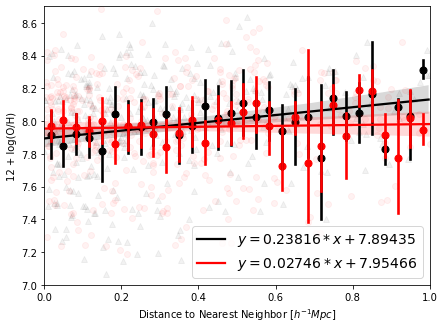

In [12]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1
for select, mc, label, c, m in zip([dwarf_wall_t3, dwarf_void_t3], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d_all = dwarf_t3['2D_neighbor_dist'][select & sfd_t3]
    vals_all = dwarf_t3['Z12logOH'][select & sfd_t3]
    
    #d_all = dwarf_t3['2D_neighbor_dist'][select]
    #vals_all = dwarf_t3['Z12logOH'][select]
    
    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = ~np.isnan(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})      
        
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='12 + log(O/H)', xlim=(0,1), ylim=(7,8.7));
        
    ax.legend()
        
    #fig.savefig('sfd_Z12logOH_2D_LR.png')

## N2 method, not constrained by t3 (not working?)

4.324204998298122
8.700750091858488


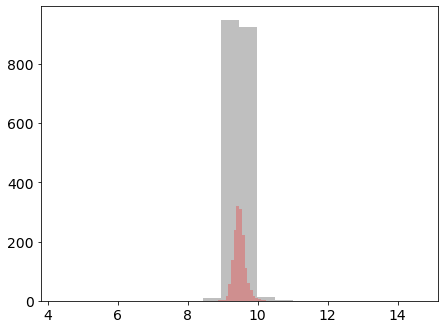

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    #d_all = dwarf_table2['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table2['Z12logOH_N2'][select & sfd]
    
    d_all = dwarf_table2['2D_neighbor_dist'][select]
    vals_all = dwarf_table2['Z12logOH_O3N2'][select]
    
    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
    
    print(np.min(vals[nonan]))
    
    #ax.hist(vals[nonan], alpha = .25, color=c)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
    
    ax.hist(vals[nonan], alpha = .25, color=c ,bins = 20)
    
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    '''slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})      
        
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='12 + log(O/H)', xlim=(0,1))#, ylim=(7,8.7));
        
    ax.legend()'''
        
    #fig.savefig('sfd_Z12logOH_2D_LR.png')

-0.13775975082223588
7.9248028240716275


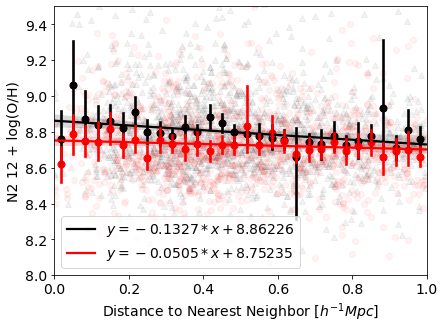

In [27]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    #d_all = dwarf_table2['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table2['Z12logOH_N2'][select & sfd]
    
    d_all = dwarf_table2['3D_neighbor_dist'][select]
    vals_all = dwarf_table2['Z12logOH_N2'][select]
    
    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
    
    print(np.min(vals[nonan]))
    
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})      
        
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='N2 12 + log(O/H)', xlim=(0,1), ylim=(8,9.5));
        
    ax.legend()
        
    #fig.savefig('sfd_Z12logOH_2D_LR.png')

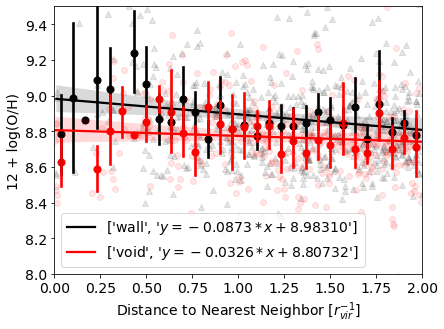

In [28]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 2
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d_all = dwarf_table2['3D_neighbor_dist_vir'][select]
    vals_all = dwarf_table2['Z12logOH_N2'][select]
    
    mask = (d_all > 0) & (d_all <= d_max)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.1, color=c, marker=m)
        
    xedges = np.linspace(0,2,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    #slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                #line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})   
    
    result = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
    
    
    ax.set(xlabel='Distance to Nearest Neighbor [$r^{-1}_{vir}]$', ylabel='12 + log(O/H)', xlim=(0,2), ylim=(8,9.5));
        
    ax.legend()

## N2O2 Method (linear regression not working?)

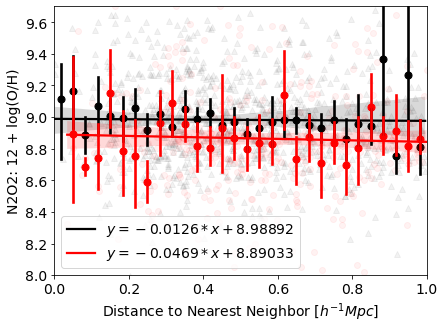

In [29]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    #d_all = dwarf_table2['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table2['Z12logOH_N2O2'][select & sfd]
    
    d_all = dwarf_table2['3D_neighbor_dist'][select]
    vals_all = dwarf_table2['Z12logOH_N2O2'][select]
    
    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})      
        
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='N2O2: 12 + log(O/H)', xlim=(0,1), ylim=(8,9.7));
        
    ax.legend()

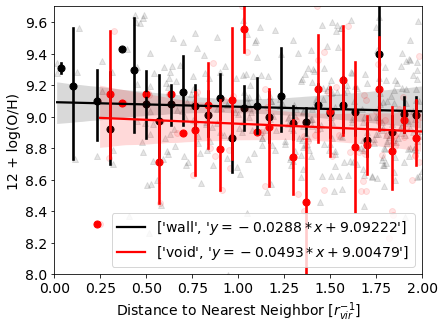

In [30]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 2
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d_all = dwarf_table2['3D_neighbor_dist_vir'][select]
    vals_all = dwarf_table2['Z12logOH_N2O2'][select]
    
    mask = (d_all > 0) & (d_all <= d_max)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.1, color=c, marker=m)
        
    xedges = np.linspace(0,2,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    #slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                #line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})   
    
    result = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
    
    
    ax.set(xlabel='Distance to Nearest Neighbor [$r^{-1}_{vir}]$', ylabel='12 + log(O/H)', xlim=(0,2), ylim=(8,9.7));
        
    ax.legend()

## O3N2 Method

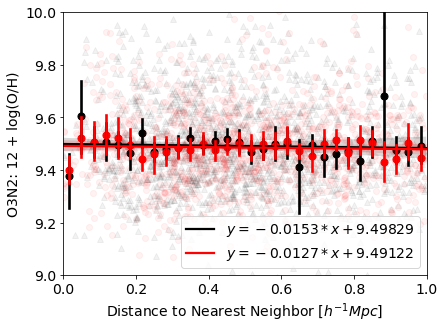

In [31]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    #d_all = dwarf_table2['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table2['Z12logOH_O3N2'][select & sfd]
    
    d_all = dwarf_table2['3D_neighbor_dist'][select]
    vals_all = dwarf_table2['Z12logOH_O3N2'][select]
    
    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})      
        
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='O3N2: 12 + log(O/H)', xlim=(0,1), ylim=(9,10));
        
    ax.legend()

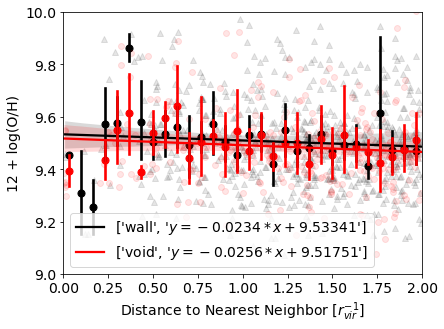

In [32]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 2
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d_all = dwarf_table2['3D_neighbor_dist_vir'][select]
    vals_all = dwarf_table2['Z12logOH_O3N2'][select]
    
    mask = (d_all > 0) & (d_all <= d_max)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.1, color=c, marker=m)
        
    xedges = np.linspace(0,2,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    #slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                #line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})   
    
    result = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
    
    
    ax.set(xlabel='Distance to Nearest Neighbor [$r^{-1}_{vir}]$', ylabel='12 + log(O/H)', xlim=(0,2), ylim=(9,10));
        
    ax.legend()

In [18]:
len(dwarf_table)
#len(dwarf_t3)

12950

# Groups

In [33]:
group_2D_dwarf_table = Table.read('g_dwarf_table_2D.txt', format = 'ascii.commented_header')
group_2D_dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,BPTclass,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,2D_group_ID,2D_group_dist,2D_group_ID_vir,2D_group_dist_vir,3D_group_ID,3D_group_dist,3D_group_ID_vir,3D_group_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,1.0,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,4270,0.8122744988884393,4270,0.8348144901217259,4270,1.337840690743606,4270,1.3749647386881871
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895168542862,-16.594152450561523,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,1.0,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,92,0.3052372880294029,4270,0.05797735488734115,4270,0.059586181795828516,4270,0.10726974463531468,4270,0.11024639736414664
100.5,1.0,146.53086174958216,0.781908767844665,0.02025769092142582,-16.431692123413086,2.4716179072856903,-9.588902473449707,9.31,0.0,4.419694003996986,6.953538822870812,0.33596775239087995,-1.2294645924089984,0.4681862138357456,2,289,1.0,296,0.3160018638066713,296,1.4188280832387938,323,0.5037906584927532,296,2.8296931864313977,2539,1.6396300861191246,2539,1.6396300861191246,2539,1.6458507189025815,2539,1.6458507189025815
51.48,1.0,147.83560177025691,0.8997165632924147,0.020493237301707268,-16.619539260864258,1.6862696409225464,-9.780756950378418,nan,nan,nan,nan,nan,nan,nan,2,567,1.0,585,0.2369676597204177,585,0.8694086806522504,585,0.2780576563053593,585,1.020163428203321,2539,0.3073475111216157,2539,0.3073475111216157,2539,0.9030335556757442,2539,0.9030335556757442
61.58,1.0,148.44052081323045,0.7867939603113092,0.02051127329468727,-16.596445083618164,1.6433095932006836,-9.7621431350708,9.07,nan,nan,nan,nan,nan,nan,2,677,1.0,624,0.1343098163915123,624,1.2909916715339467,567,0.6622767538819025,585,2.521902267209164,2539,0.5321262031276628,2539,0.5321262031276628,2539,1.04828589147542,2539,1.04828589147542


In [34]:
group_3D_dwarf_table = Table.read('g_dwarf_table.txt', format = 'ascii.commented_header')
group_3D_dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,BPTclass,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,2D_group_ID,2D_group_dist,2D_group_ID_vir,2D_group_dist_vir,3D_group_ID,3D_group_dist,3D_group_ID_vir,3D_group_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,1.0,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,-1,nan,-1,nan,15644,41.4125128116787,2539,41.76447666154416
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,1.0,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,4270,0.8122744988884393,4270,0.8348144901217259,4270,1.337840690743606,4270,1.3749647386881871
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,1.0,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,-1,nan,-1,nan,15644,47.99876009341575,2539,48.37100908551739
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,1.0,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,-1,nan,-1,nan,15644,45.91917727954949,2539,46.289567183583294
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,1.0,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,-1,nan,-1,nan,15644,42.14864050680927,2539,42.50789399533266


In [35]:
group_2D_dwarf_table2 = join(group_2D_dwarf_table, new_metallicities, join_type='left', keys='ID')
group_3D_dwarf_table2 = join(group_3D_dwarf_table, new_metallicities, join_type='left', keys='ID')

In [64]:
dwarf_wall = group_2D_dwarf_table2['vflag_VF']==0
dwarf_void = group_2D_dwarf_table2['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

## N2

8.256272190378665
8.283673237779002


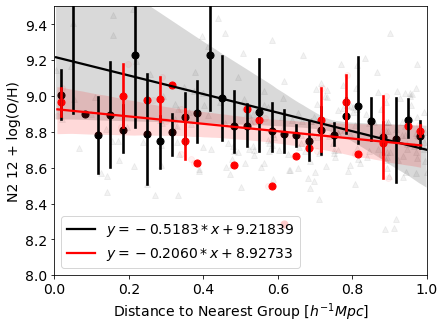

In [42]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    #d_all = dwarf_table2['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table2['Z12logOH_N2'][select & sfd]
    
    d_all = group_3D_dwarf_table2['3D_group_dist'][select]
    vals_all = group_3D_dwarf_table2['Z12logOH_N2'][select]
    
    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
    
    print(np.min(vals[nonan]))
    
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})      
        
    ax.set(xlabel='Distance to Nearest Group [$h^{-1}Mpc]$', ylabel='N2 12 + log(O/H)', xlim=(0,1), ylim=(8,9.5));
        
    ax.legend()
        
    #fig.savefig('sfd_Z12logOH_2D_LR.png')

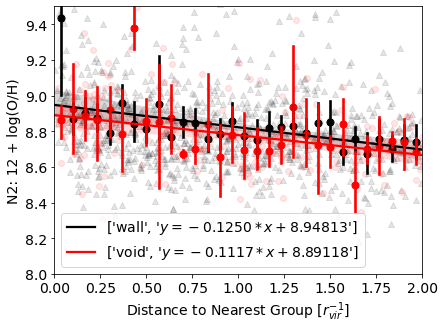

In [65]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 2
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d_all = group_2D_dwarf_table2['2D_group_dist_vir'][select]
    vals_all = group_2D_dwarf_table2['Z12logOH_N2'][select]
    
    mask = (d_all > 0) & (d_all <= d_max)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.1, color=c, marker=m)
        
    xedges = np.linspace(0,2,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    #slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                #line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})   
    
    result = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
    
    
    ax.set(xlabel='Distance to Nearest Group [$r^{-1}_{vir}]$', ylabel='N2: 12 + log(O/H)', xlim=(0,2), ylim=(8,9.5));
        
    ax.legend()

## N2O2

7.426289808336096
8.035614780610764


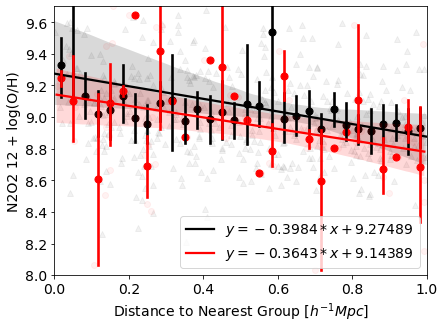

In [52]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    #d_all = dwarf_table2['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table2['Z12logOH_N2'][select & sfd]
    
    d_all = group_2D_dwarf_table2['2D_group_dist'][select]
    vals_all = group_2D_dwarf_table2['Z12logOH_N2O2'][select]
    
    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
    
    print(np.min(vals[nonan]))
    
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})      
        
    ax.set(xlabel='Distance to Nearest Group [$h^{-1}Mpc]$', ylabel='N2O2 12 + log(O/H)', xlim=(0,1), ylim=(8,9.7));
        
    ax.legend()

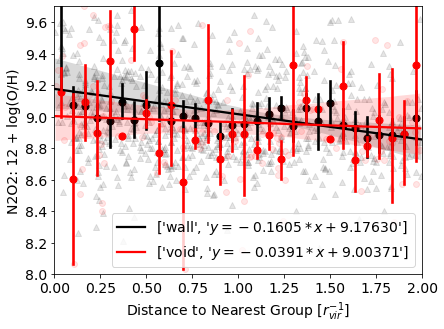

In [66]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 2
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d_all = group_2D_dwarf_table2['2D_group_dist_vir'][select]
    vals_all = group_2D_dwarf_table2['Z12logOH_N2O2'][select]
    
    mask = (d_all > 0) & (d_all <= d_max)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.1, color=c, marker=m)
        
    xedges = np.linspace(0,2,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    #slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                #line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})   
    
    result = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
    
    
    ax.set(xlabel='Distance to Nearest Group [$r^{-1}_{vir}]$', ylabel='N2O2: 12 + log(O/H)', xlim=(0,2), ylim=(8,9.7));
        
    ax.legend()

## O3N2

9.124258044588633
9.285645143486343


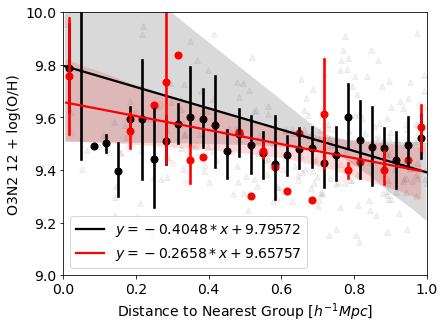

In [58]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    #d_all = dwarf_table2['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table2['Z12logOH_N2'][select & sfd]
    
    d_all = group_3D_dwarf_table2['3D_group_dist'][select]
    vals_all = group_3D_dwarf_table2['Z12logOH_O3N2'][select]
    
    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
    
    print(np.min(vals[nonan]))
    
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})      
        
    ax.set(xlabel='Distance to Nearest Group [$h^{-1}Mpc]$', ylabel='O3N2 12 + log(O/H)', xlim=(0,1), ylim=(9,10));
        
    ax.legend()

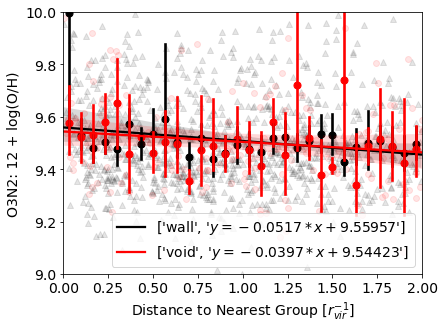

In [67]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 2
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d_all = group_2D_dwarf_table2['2D_group_dist_vir'][select]
    vals_all = group_2D_dwarf_table2['Z12logOH_O3N2'][select]
    
    mask = (d_all > 0) & (d_all <= d_max)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.1, color=c, marker=m)
        
    xedges = np.linspace(0,2,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    #slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                #line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})   
    
    result = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
    
    
    ax.set(xlabel='Distance to Nearest Group [$r^{-1}_{vir}]$', ylabel='O3N2: 12 + log(O/H)', xlim=(0,2), ylim=(9,10));
        
    ax.legend()